## Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Data Collection

In [2]:
data = pd.read_csv('/home/bibekg/Learning/AQI_COL/Air-Quality-Prediction/airprediction/Data/Real-Data/Real_Combine.csv')

# Reading first 5 rows
data.head()

,T,TM,Tm,SLP,H,VV,V,VM,AQI
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


<AxesSubplot:>

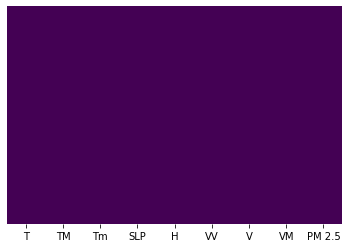

In [3]:
data.isnull().sum()

# if we have minimum null values we can drop null values
data = data.dropna()
# We don`t have null values

# Plotting the Null values
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Dividing the Features

In [4]:
X = data.drop(['AQI'], axis=1) # Droping the Target Variable i.e. AQI
Y = pd.DataFrame(data['AQI']) # Assigning the Target Vatiavle to Y

### Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [5]:
from sklearn.ensemble  import ExtraTreesRegressor

In [6]:
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [7]:
# This is used when we have many features and we have to select top 10 featues from the DataSet
fea_impotance = pd.DataFrame({
                                 'Features': X.columns,
                                 'Feature_Imp' : model.feature_importances_
                                 })
fea_impotance

,Features,Feature_Imp
0,T,0.260729
1,TM,0.140093
2,Tm,0.225910
3,SLP,0.000000
4,H,0.095293
5,VV,0.085322
6,V,0.123461
7,VM,0.069192


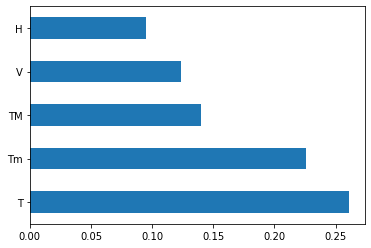

In [8]:
# Plotting the Graph of FEATURE IMPORTANCE for better visualisation
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.nlargest(5).plot(kind='barh')
plt.show()

### Train Test Data Split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.3, train_size=0.7, random_state=0)

## Implementing Ridge Regression

In [10]:
from sklearn.linear_model import Ridge

# Used for selecting the best Learning(ALPHA) Parameter
from sklearn.model_selection import GridSearchCV

In [11]:
ridge=Ridge()

parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}

ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)

ridge_regressor.fit(X,Y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [12]:
R_best_parameter = ridge_regressor.best_params_
print(f'Ridge: Best Parameter: {R_best_parameter}')

R_best_score = ridge_regressor.best_score_
print(f'Ridge: Best Score: {R_best_score}')

Ridge: Best Parameter: {'alpha': 40}
Ridge: Best Score: -4163.080439911438


## Implementing Ridge Regression

In [13]:
from sklearn.linear_model import Lasso

# Used for selecting the best Learning(ALPHA) Parameter
from sklearn.model_selection import GridSearchCV

In [14]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,Y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [15]:
L_best_parameter = lasso_regressor.best_params_
print(f'Lasso : Best Parameter: {L_best_parameter}')

L_best_score = lasso_regressor.best_score_
print(f'Lasso : Best Score: {L_best_score}')

Lasso : Best Parameter: {'alpha': 1}
Lasso : Best Score: -4152.543101101002


### Linear Regression

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [17]:
lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,X,Y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-4168.860770796369


### Model Evaluation

In [18]:
prediction=lasso_regressor.predict(X_test)

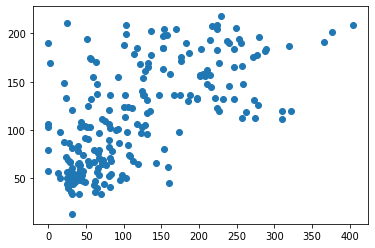

In [19]:
plt.scatter(Y_test,prediction)

### Comparison Linear, Ridge and Lasso Regression

In [20]:
R_best_parameter = ridge_regressor.best_params_
print(f'Ridge: Best Parameter: {R_best_parameter}')

R_best_score = ridge_regressor.best_score_
print(f'Ridge: Best Score: {R_best_score}')


L_best_parameter = lasso_regressor.best_params_
print(f'\nLasso : Best Parameter: {L_best_parameter}')

L_best_score = lasso_regressor.best_score_
print(f'Lasso : Best Score: {L_best_score}')

print(f'\nLinear Regression: MSE: {mean_mse}')

Ridge: Best Parameter: {'alpha': 40}
Ridge: Best Score: -4163.080439911438

Lasso : Best Parameter: {'alpha': 1}
Lasso : Best Score: -4152.543101101002

Linear Regression: MSE: -4168.860770796369


In [21]:
# Calculting some of the Errors
from sklearn import metrics

In [22]:
print(f'MAE: {metrics.mean_absolute_error(Y_test,prediction)}')
print(f'MSE: {metrics.mean_squared_error(Y_test,prediction)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(Y_test,prediction))}')

MAE: 49.182993625156996
MSE: 4468.953319546772
RMSE: 66.85023051229346


### Creating PKL FileFormat for deployment purpose

In [23]:
import pickle

In [24]:
# Open a file 
file = open('regression_ridge_lasso.pkl', 'wb')

# dump information to that file
pickle.dump(lasso_regressor,file)